In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
### Input data
df = pd.read_csv('sheet1.csv')
print(df.head(6))

        ID Customer Name    Division Gender MaritalStatus  Age  Income
0  BU79786     Christine       Dhaka      F       Married   39   56274
1  QZ44356         Susan    Rajshahi      F        Single   43       0
2  AI49188      Margaret      Khulna      F       Married   44   48767
3  WW63253         David    Barishal      M       Married   46       0
4  HB64268         Peter  Mymensingh      M        Single   48   43836
5  OC83172        Judith      Sylhet      F       Married   49   62902


In [3]:
### Drop The ID column
data = df.drop('ID', axis = 1)
print(data.head(6))

  Customer Name    Division Gender MaritalStatus  Age  Income
0     Christine       Dhaka      F       Married   39   56274
1         Susan    Rajshahi      F        Single   43       0
2      Margaret      Khulna      F       Married   44   48767
3         David    Barishal      M       Married   46       0
4         Peter  Mymensingh      M        Single   48   43836
5        Judith      Sylhet      F       Married   49   62902


In [4]:
### Encoding Data
data['Gender'] = data['Gender'].replace({'M':0, 'F':1})
data['MaritalStatus'] = data['MaritalStatus'].replace({'Married':0, 'Single':1, 'Divorced':2})
data['Division'] = data['Division'].replace({'Dhaka':0, 'Rajshahi':1, 'Khulna':2, 'Barishal':3, 'Mymensingh':4, 'Sylhet':5,
                                             'Rangpur':6, 'Chattogram':7})
print(data.head(6))

  Customer Name  Division  Gender  MaritalStatus  Age  Income
0     Christine         0       1              0   39   56274
1         Susan         1       1              1   43       0
2      Margaret         2       1              0   44   48767
3         David         3       0              0   46       0
4         Peter         4       0              1   48   43836
5        Judith         5       1              0   49   62902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


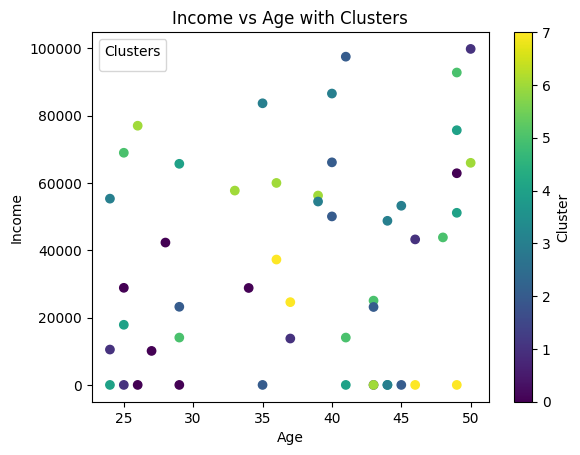

In [5]:
### KMeans with divisions only
km = KMeans(n_clusters = 8, init = 'k-means++', random_state = 420)
km.fit(data['Division'].values.reshape(-1,1))
labels = km.labels_

km_data = data.copy()
km_data['Cluster'] = labels

plt.scatter(km_data['Age'], km_data['Income'], c=km_data['Cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age with Clusters')
plt.colorbar(label='Cluster')
plt.legend(title='Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


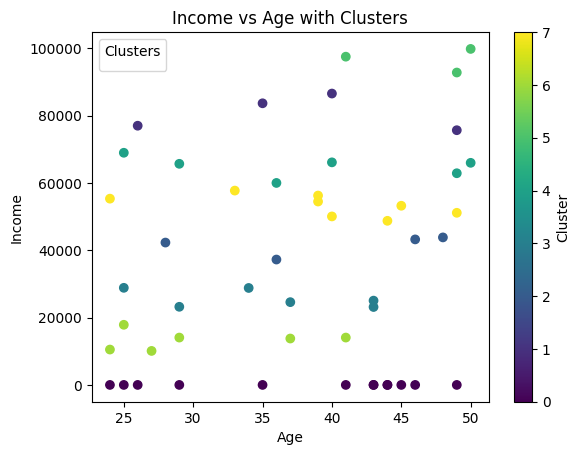

In [6]:
### KMeans with all features except name
km = KMeans(n_clusters = 8, init = 'k-means++', random_state = 420)
km.fit(data.drop('Customer Name', axis=1))
labels = km.labels_

km_data = data.copy()
km_data['Cluster'] = labels

plt.scatter(km_data['Age'], km_data['Income'], c=km_data['Cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age with Clusters')
plt.colorbar(label='Cluster')
plt.legend(title='Clusters')
plt.show()

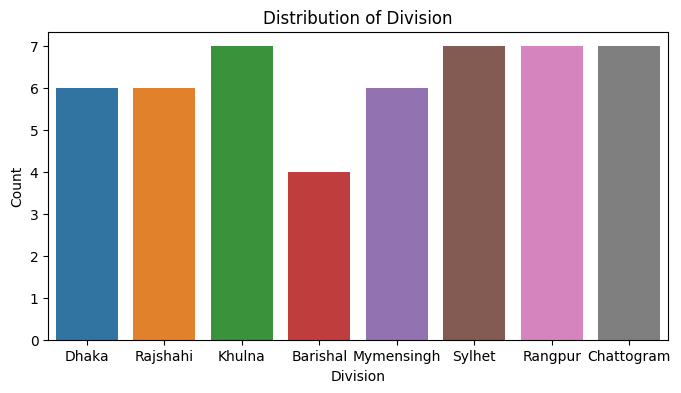

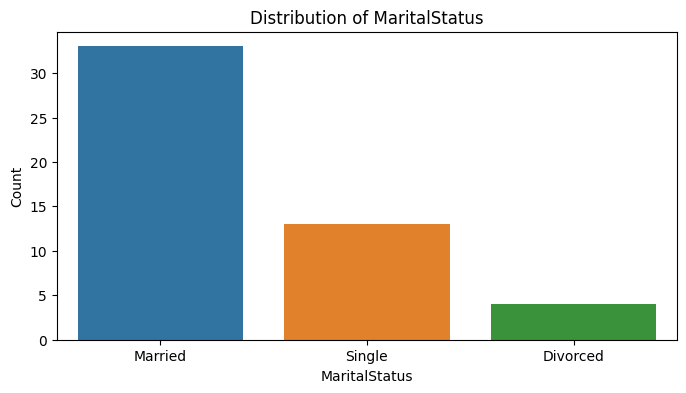

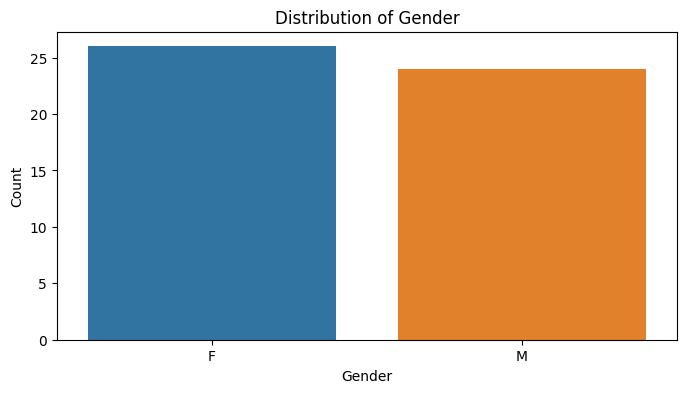

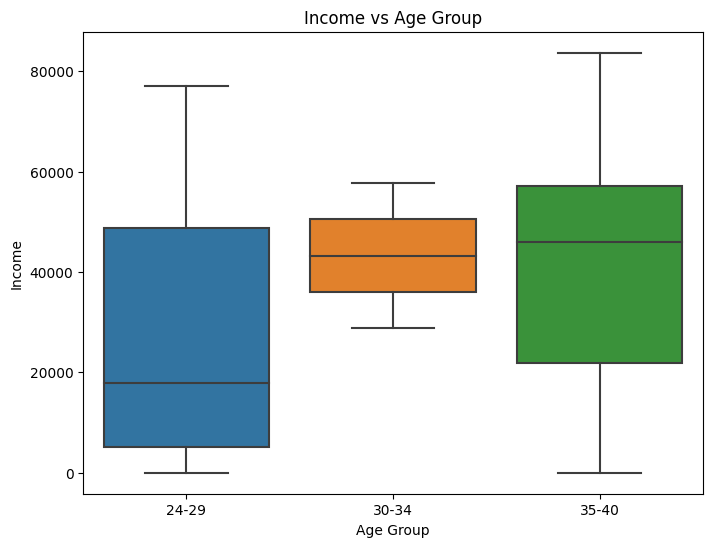

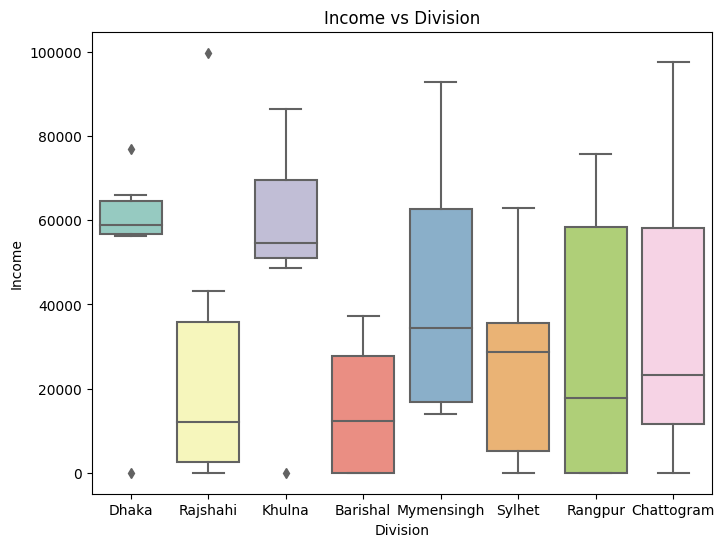

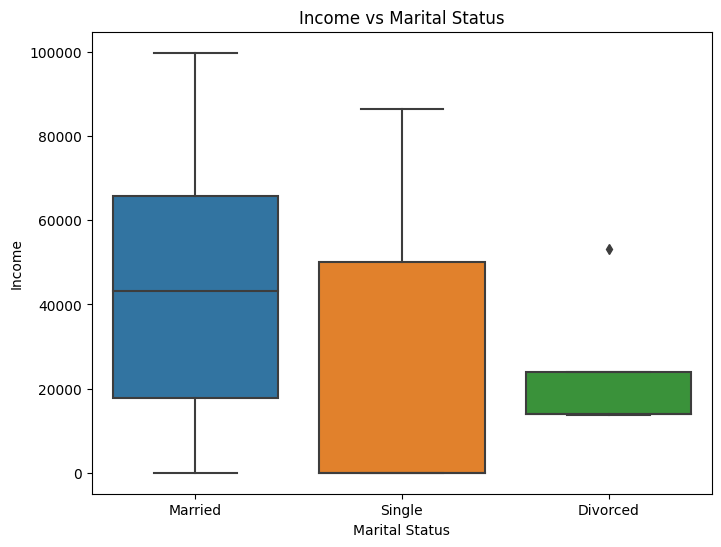

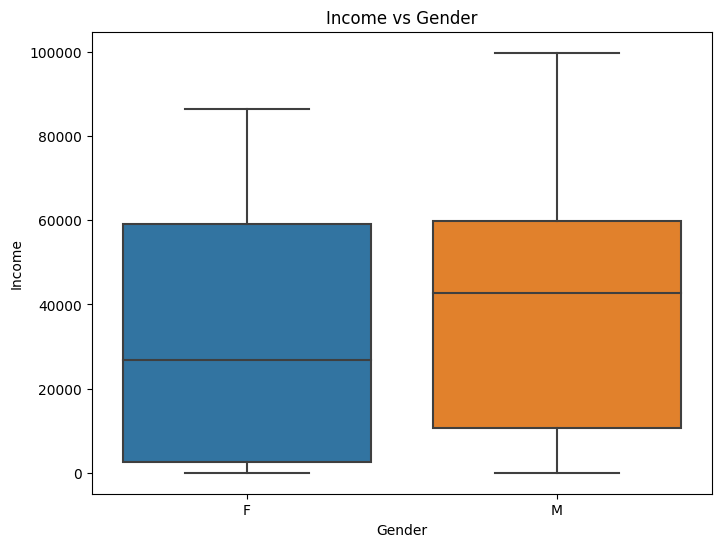

In [7]:
## Some visualizations
age_bins = [24, 30, 35, 40]
age_labels = ['24-29', '30-34', '35-40']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

### Bar plots
categorical_cols = ['Division', 'MaritalStatus', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

### Box plots with categorical variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='AgeGroup', y='Income', data=df)
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.title('Income vs Age Group')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Division', y='Income', data=df, palette='Set3')
plt.xlabel('Division')
plt.ylabel('Income')
plt.title('Income vs Division')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='MaritalStatus', y='Income', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income vs Marital Status')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Income', data=df)
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income vs Gender')
plt.show()


In [8]:
## Grouping and Aggregation

# Grouping by Division and calculating mean income
division_group = df.groupby('Division')['Income'].mean()
print(division_group)

# Grouping by MaritalStatus and calculating median age
Age_group = df.groupby('AgeGroup')['Income'].median()
print(Age_group)

# Grouping by Gender and calculating maximum income
gender_group = df.groupby('Gender')['Income'].max()
print(gender_group)

# Compute correlation matrix
correlation_matrix = df[['Age', 'Income']].corr()
print(correlation_matrix)



Division
Barishal      15464.750000
Chattogram    37161.142857
Dhaka         52844.833333
Khulna        54590.428571
Mymensingh    43141.666667
Rajshahi      27898.166667
Rangpur       30059.142857
Sylhet        24711.285714
Name: Income, dtype: float64
AgeGroup
24-29    17870.0
30-34    43280.5
35-40    45880.0
Name: Income, dtype: float64
Gender
F    86584
M    99845
Name: Income, dtype: int64
             Age    Income
Age     1.000000  0.209241
Income  0.209241  1.000000


In [9]:
## Hypothesis testint
print('Null hypothesis: There is no difference of income between different divisions')

### Perform ANOVA
division_dhaka = df[df['Division'] == 'Dhaka']['Income']
division_rajshahi = df[df['Division'] == 'Rajshahi']['Income']
division_khulna = df[df['Division'] == 'Khulna']['Income']
division_barishal = df[df['Division'] == 'Barishal']['Income']
division_mymensingh = df[df['Division'] == 'Mymensingh']['Income']
division_sylhet = df[df['Division'] == 'Sylhet']['Income']
division_rangpur = df[df['Division'] == 'Rangpur']['Income']
division_chattogram = df[df['Division'] == 'Chattogram']['Income']

f_statistic, p_value = f_oneway(division_dhaka, division_rajshahi, division_khulna, division_barishal,
                               division_mymensingh, division_sylhet, division_rangpur, division_chattogram)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("Since the p-value is higher than the level of significance, we say there is no statistical difference of the income in different divisions")


Null hypothesis: There is no difference of income between different divisions
F-Statistic: 1.149007899700247
P-Value: 0.3520946612634549
Since the p-value is higher than the level of significance, we say there is no statistical difference of the income in different divisions
